In [257]:
import numpy as np
import matplotlib.pyplot as plt    #importing the libraries
import pandas as pd
import seaborn as sns
sns.set(color_codes=True)

In [258]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [259]:
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn import tree

In [260]:
dataset = pd.read_csv('/content/drive/MyDrive/Heart Attack Disease/heart.csv')
x = dataset.iloc[:, :-1].values    #importing the dataset
y = dataset.iloc[:, -1].values

In [261]:
print(x)

[[65.  1.  3. ...  0.  0.  1.]
 [37.  1.  2. ...  0.  0.  2.]
 [41.  0.  1. ...  2.  0.  2.]
 ...
 [68.  1.  0. ...  1.  2.  3.]
 [57.  1.  0. ...  1.  1.  3.]
 [57.  0.  1. ...  1.  1.  2.]]


In [262]:
print(y)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0]


In [263]:
#taking care of missing data
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
imputer.fit(x[:, 0:12])
x[:, 0:12] = imputer.transform(x[:, 0:12])

In [264]:
print(x)

[[65.  1.  3. ...  0.  0.  1.]
 [37.  1.  2. ...  0.  0.  2.]
 [41.  0.  1. ...  2.  0.  2.]
 ...
 [68.  1.  0. ...  1.  2.  3.]
 [57.  1.  0. ...  1.  1.  3.]
 [57.  0.  1. ...  1.  1.  2.]]


In [265]:
dataset.isnull().sum()

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64

In [266]:
#encoding the independent variable
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [0])], remainder='passthrough')
x = np.array(ct.fit_transform(x))

In [267]:
print(x)

  (0, 31)	1.0
  (0, 41)	1.0
  (0, 42)	3.0
  (0, 43)	145.0
  (0, 44)	233.0
  (0, 45)	1.0
  (0, 47)	150.0
  (0, 49)	2.3
  (0, 52)	1.0
  (1, 3)	1.0
  (1, 41)	1.0
  (1, 42)	2.0
  (1, 43)	130.0
  (1, 44)	250.0
  (1, 46)	1.0
  (1, 47)	187.0
  (1, 49)	3.5
  (1, 52)	2.0
  (2, 7)	1.0
  (2, 42)	1.0
  (2, 43)	130.0
  (2, 44)	204.0
  (2, 47)	172.0
  (2, 49)	1.4
  (2, 50)	2.0
  :	:
  (300, 46)	1.0
  (300, 47)	141.0
  (300, 49)	3.4
  (300, 50)	1.0
  (300, 51)	2.0
  (300, 52)	3.0
  (301, 23)	1.0
  (301, 41)	1.0
  (301, 43)	130.0
  (301, 44)	131.0
  (301, 46)	1.0
  (301, 47)	115.0
  (301, 48)	1.0
  (301, 49)	1.2
  (301, 50)	1.0
  (301, 51)	1.0
  (301, 52)	3.0
  (302, 23)	1.0
  (302, 42)	1.0
  (302, 43)	130.0
  (302, 44)	236.0
  (302, 47)	174.0
  (302, 50)	1.0
  (302, 51)	1.0
  (302, 52)	2.0


In [268]:
#encoding the dependent variable
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)

In [269]:
print(y)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0]


In [270]:
dataset.shape

(303, 14)

In [271]:
df = dataset.head()
df

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,65,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [272]:
dff = dataset.tail()
dff

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [273]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


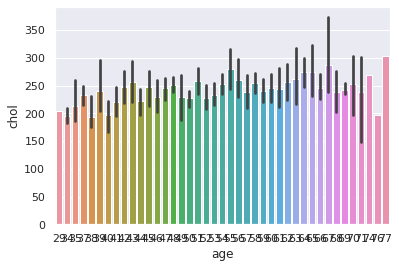

In [274]:
#dataset visualization bar plot
sns.barplot(dataset['age'], dataset['chol'])
plt.savefig('ex.png')

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


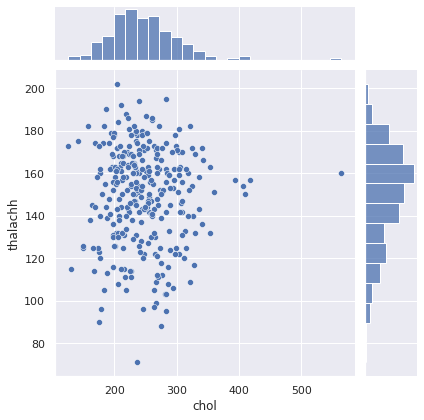

In [275]:
#dataset visualization joint plot
sns.jointplot(dataset['chol'], dataset['thalachh'])
plt.savefig('ex5.png')

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


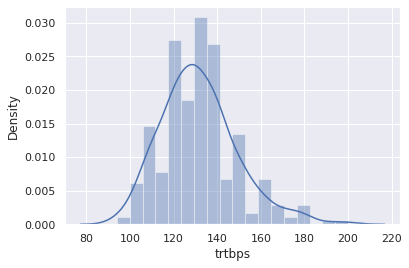

In [276]:
#dataset visualization histogram
sns.distplot(dataset['trtbps'])
plt.savefig('ex2.png')

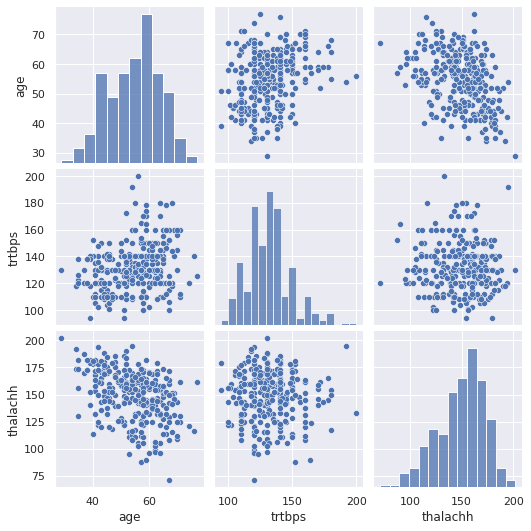

In [277]:
#dataset visualization pair plot
sns.pairplot(dataset[['age', 'trtbps', 'thalachh']])
plt.savefig('ex3.png')

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


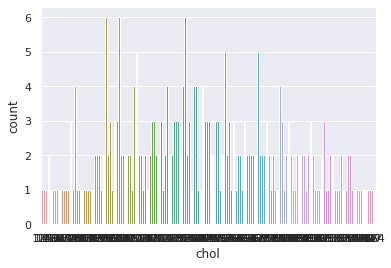

In [278]:
#dataset visualization count plot
sns.countplot(dataset['chol'])
plt.savefig('ex4.png')

In [279]:
independent = dataset.iloc[:, :-1].values

In [280]:
independent

array([[65.,  1.,  3., ...,  0.,  0.,  1.],
       [37.,  1.,  2., ...,  0.,  0.,  2.],
       [41.,  0.,  1., ...,  2.,  0.,  2.],
       ...,
       [68.,  1.,  0., ...,  1.,  2.,  3.],
       [57.,  1.,  0., ...,  1.,  1.,  3.],
       [57.,  0.,  1., ...,  1.,  1.,  2.]])

In [281]:
dependent = dataset.iloc[:, -1].values

In [282]:
dependent

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [283]:
#train_test_split
x_train, x_test, y_train, y_test= train_test_split(independent,dependent,test_size=0.2,random_state=5)

In [284]:
x_train

array([[55.,  0.,  0., ...,  1.,  0.,  2.],
       [43.,  0.,  0., ...,  1.,  0.,  3.],
       [53.,  1.,  2., ...,  2.,  3.,  2.],
       ...,
       [46.,  0.,  1., ...,  2.,  0.,  2.],
       [41.,  1.,  0., ...,  2.,  0.,  3.],
       [59.,  1.,  0., ...,  1.,  1.,  3.]])

In [285]:
x_test

array([[5.70e+01, 0.00e+00, 1.00e+00, 1.30e+02, 2.36e+02, 0.00e+00,
        0.00e+00, 1.74e+02, 0.00e+00, 0.00e+00, 1.00e+00, 1.00e+00,
        2.00e+00],
       [5.70e+01, 1.00e+00, 0.00e+00, 1.52e+02, 2.74e+02, 0.00e+00,
        1.00e+00, 8.80e+01, 1.00e+00, 1.20e+00, 1.00e+00, 1.00e+00,
        3.00e+00],
       [5.40e+01, 1.00e+00, 0.00e+00, 1.22e+02, 2.86e+02, 0.00e+00,
        0.00e+00, 1.16e+02, 1.00e+00, 3.20e+00, 1.00e+00, 2.00e+00,
        2.00e+00],
       [6.10e+01, 0.00e+00, 0.00e+00, 1.45e+02, 3.07e+02, 0.00e+00,
        0.00e+00, 1.46e+02, 1.00e+00, 1.00e+00, 1.00e+00, 0.00e+00,
        3.00e+00],
       [4.00e+01, 1.00e+00, 3.00e+00, 1.40e+02, 1.99e+02, 0.00e+00,
        1.00e+00, 1.78e+02, 1.00e+00, 1.40e+00, 2.00e+00, 0.00e+00,
        3.00e+00],
       [6.10e+01, 1.00e+00, 0.00e+00, 1.40e+02, 2.07e+02, 0.00e+00,
        0.00e+00, 1.38e+02, 1.00e+00, 1.90e+00, 2.00e+00, 1.00e+00,
        3.00e+00],
       [5.60e+01, 1.00e+00, 1.00e+00, 1.30e+02, 2.21e+02, 0.00e+00,
  

In [286]:
dataset.drop('chol',axis=1,inplace=True)

In [287]:
dataset.head()

,age,sex,cp,trtbps,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,65,1,3,145,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,0,1,163,1,0.6,2,0,2,1


In [288]:
dataset.output.value_counts()

1    165
0    138
Name: output, dtype: int64

In [289]:
encode = LabelEncoder()
dataset.output = encode.fit_transform(dataset.output)

In [290]:
dataset.output.value_counts()

1    165
0    138
Name: output, dtype: int64

In [291]:
x = dataset.drop('output',axis=1)
y = dataset.output

In [292]:
x

,age,sex,cp,trtbps,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall
0,65,1,3,145,1,0,150,0,2.3,0,0,1
1,37,1,2,130,0,1,187,0,3.5,0,0,2
2,41,0,1,130,0,0,172,0,1.4,2,0,2
3,56,1,1,120,0,1,178,0,0.8,2,0,2
4,57,0,0,120,0,1,163,1,0.6,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,0,1,123,1,0.2,1,0,3
299,45,1,3,110,0,1,132,0,1.2,1,0,3
300,68,1,0,144,1,1,141,0,3.4,1,2,3
301,57,1,0,130,0,1,115,1,1.2,1,1,3


In [293]:
hot_encode = OneHotEncoder()
x = hot_encode.fit_transform(x)

In [294]:
x

<303x246 sparse matrix of type '<class 'numpy.float64'>'
	with 3636 stored elements in Compressed Sparse Row format>

In [295]:
#train_test_split
x_train, x_test, y_train, y_test= train_test_split(independent,dependent,test_size=0.2,random_state=5)
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((242, 13), (242,), (61, 13), (61,))

In [296]:
#modeling
dt = tree.DecisionTreeClassifier()
dt.fit(x_train,y_train)

DecisionTreeClassifier()

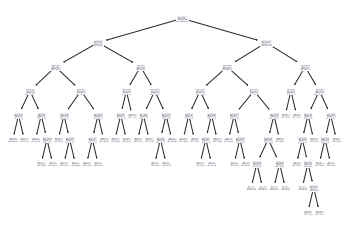

In [297]:
_=tree.plot_tree(dt)

In [298]:
cross_val_score(dt,x,y, cv=3)

array([0.77227723, 0.76237624, 0.63366337])

In [299]:
cross_val_score(dt,x,y, cv=3).mean()

0.7326732673267328

In [300]:
print(classification_report(y_test,dt.predict(x_test)))

              precision    recall  f1-score   support

           0       0.83      0.83      0.83        30
           1       0.84      0.84      0.84        31

    accuracy                           0.84        61
   macro avg       0.84      0.84      0.84        61
weighted avg       0.84      0.84      0.84        61



In [301]:
class_dict = {1:'Yes',0:'No'}

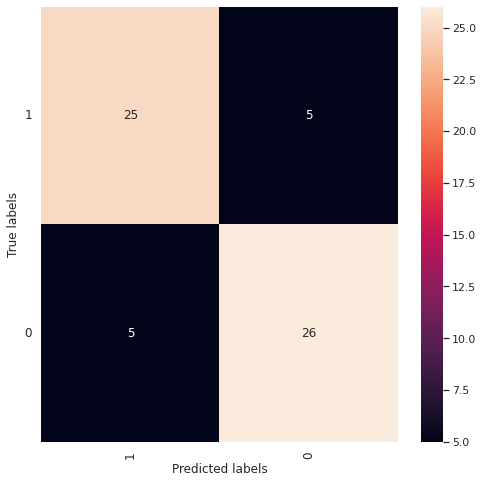

In [302]:
cm = confusion_matrix(y_test, dt.predict(x_test))
fig, ax = plt.subplots(figsize=(8,8))

g = sns.heatmap(cm,annot=True,ax=ax)
g.set_yticklabels(g.get_yticklabels(), rotation = 0, fontsize = 12)
g.set_xticklabels(g.get_xticklabels(), rotation = 90, fontsize = 12)
ax.xaxis.set_ticklabels(class_dict.keys()); ax.yaxis.set_ticklabels(class_dict.keys());
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 

In [303]:
#feature scalling
stndrd=StandardScaler()
x_train=stndrd.fit_transform(x_train)

In [304]:
x_test=stndrd.transform(x_test)

In [305]:
x_train

array([[ 0.06931211, -1.50674161, -0.97227182, ..., -0.65683133,
        -0.69043052, -0.49747423],
       [-1.27257043, -1.50674161, -0.97227182, ..., -0.65683133,
        -0.69043052,  1.15168692],
       [-0.15433498,  0.6636838 ,  0.97227182, ...,  0.98186126,
         2.31108179, -0.49747423],
       ...,
       [-0.93709979, -1.50674161,  0.        , ...,  0.98186126,
        -0.69043052, -0.49747423],
       [-1.49621752,  0.6636838 , -0.97227182, ...,  0.98186126,
        -0.69043052,  1.15168692],
       [ 0.5166063 ,  0.6636838 , -0.97227182, ..., -0.65683133,
         0.31007359,  1.15168692]])

In [306]:
x_test

array([[ 0.2929592 , -1.50674161,  0.        , -0.08831373, -0.16054827,
        -0.43159531, -1.07963713,  1.04791333, -0.6636838 , -0.88059368,
        -0.65683133,  0.31007359, -0.49747423],
       [ 0.2929592 ,  0.6636838 , -0.97227182,  1.16217112,  0.58210861,
        -0.43159531,  0.84148188, -2.77960023,  1.50674161,  0.18714914,
        -0.65683133,  0.31007359,  1.15168692],
       [-0.04251143,  0.6636838 , -0.97227182, -0.54303549,  0.81663184,
        -0.43159531, -1.07963713, -1.53343302,  1.50674161,  1.9667205 ,
        -0.65683133,  1.31057769, -0.49747423],
       [ 0.74025339, -1.50674161, -0.97227182,  0.76428957,  1.22704749,
        -0.43159531, -1.07963713, -0.19825387,  1.50674161,  0.009192  ,
        -0.65683133, -0.69043052,  1.15168692],
       [-1.60804106,  0.6636838 ,  1.94454365,  0.48008847, -0.88366155,
        -0.43159531,  0.84148188,  1.22593722,  1.50674161,  0.36510627,
         0.98186126, -0.69043052,  1.15168692],
       [ 0.74025339,  0.663683

In [307]:
#multiple linear regression
from sklearn.linear_model import LinearRegression

In [308]:
regressor=LinearRegression()

In [309]:
regressor.fit(x_train,y_train)

LinearRegression()

In [310]:
y_pred=regressor.predict(x_test)

In [311]:
y_pred

array([ 0.82935476, -0.14216315, -0.12625841,  0.31295753,  0.73221584,
        0.06645534,  0.63422013, -0.10536869,  0.97800049,  0.58369924,
        0.67672447, -0.17595135,  0.7855475 ,  1.02212138,  0.27794882,
        0.28260132,  0.43117949,  0.66379088,  0.8856044 ,  0.343344  ,
       -0.21427108,  0.17568006,  1.16391427, -0.01606051,  0.28723954,
        0.75017666,  0.67516942,  1.02445055,  1.14756565,  0.07640293,
        0.98234556,  0.80154697,  0.54398318,  0.66425541,  0.19468404,
       -0.09539947,  0.82359165,  0.79960768,  0.25793081,  0.58163984,
        0.72057771,  0.15227716,  0.6370955 , -0.15627821,  0.1379417 ,
        0.05120999, -0.18597363,  0.0999893 ,  0.12262928, -0.24424485,
       -0.08075469,  0.67816393,  0.83249103,  0.66094445,  1.19838196,
        0.60139653,  0.68655798,  0.58700408,  0.57406006,  0.9106543 ,
        0.4224312 ])

In [312]:
y_test

array([0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0])

Text(0.5, 1.0, 'Actual vs. Predicted')

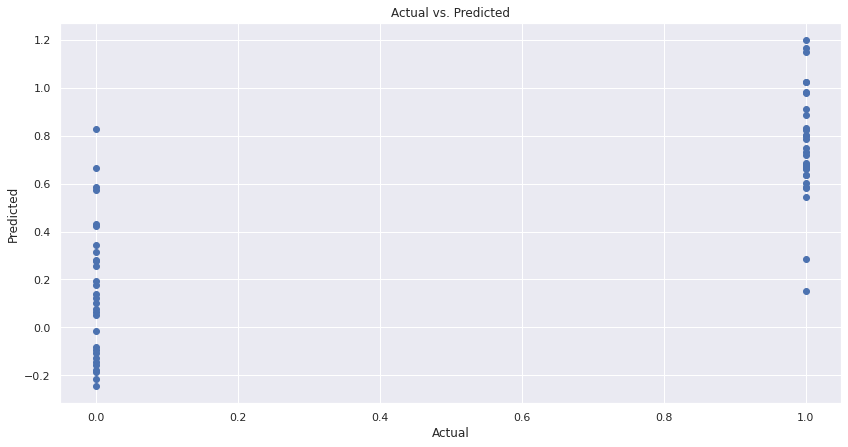

In [313]:
plt.figure(figsize=(14,7))
plt.scatter(y_test, y_pred)   
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs. Predicted')

In [314]:
#accuracy check
regressor.score(x_test,y_test)

0.5837903825403714

In [315]:
#accuracy check by randomforestclassifier
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=20)  #20 random tress
model.fit(x_train, y_train)

RandomForestClassifier(n_estimators=20)

In [316]:
model.score(x_test,y_test)

0.8852459016393442

In [317]:
model = RandomForestClassifier(n_estimators=40)  #40 random tress
model.fit(x_train, y_train)

RandomForestClassifier(n_estimators=40)

In [318]:
model.score(x_test,y_test)

0.8688524590163934